In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [2]:
df=pd.read_csv('cwurData.csv')

In [3]:
df.shape

(2200, 14)

In [4]:
df.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [6]:
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

# null value remove

In [7]:
df['broad_impact']=df['broad_impact'].replace(to_replace='NaN', value=np.nan)
df['broad_impact']=df['broad_impact'].astype(float)
mean=df['broad_impact'].mean()
df['broad_impact'].replace(np.nan,mean,inplace=True)

In [8]:
mode=df['institution'].mode().values[0]
df['institution']=df['institution'].replace(np.nan,mode)

In [9]:
mode=df['country'].mode().values[0]
df['country']=df['country'].replace(np.nan,mode)

In [10]:
df['national_rank']=df['national_rank'].replace(to_replace=0, value=np.nan)
df['national_rank']=df['national_rank'].astype(float)
mean=df['national_rank'].mean()
df['national_rank'].replace(np.nan,mean,inplace=True)

In [11]:
df['quality_of_education']=df['quality_of_education'].replace(to_replace=0, value=np.nan)
df['quality_of_education']=df['quality_of_education'].astype(float)
mean=df['quality_of_education'].mean()
df['quality_of_education'].replace(np.nan,mean,inplace=True)

In [12]:
df['alumni_employment']=df['alumni_employment'].replace(to_replace=0, value=np.nan)
df['alumni_employment']=df['alumni_employment'].astype(float)
mean=df['alumni_employment'].mean()
df['alumni_employment'].replace(np.nan,mean,inplace=True)

In [13]:
df['quality_of_faculty']=df['quality_of_faculty'].replace(to_replace=0, value=np.nan)
df['quality_of_faculty']=df['quality_of_faculty'].astype(float)
mean=df['quality_of_faculty'].mean()
df['quality_of_faculty'].replace(np.nan,mean,inplace=True)

In [14]:
df['publications']=df['publications'].replace(to_replace=0, value=np.nan)
df['publications']=df['publications'].astype(float)
mean=df['publications'].mean()
df['publications'].replace(np.nan,mean,inplace=True)

In [15]:
df['influence']=df['influence'].replace(to_replace=0, value=np.nan)
df['influence']=df['influence'].astype(float)
mean=df['influence'].mean()
df['influence'].replace(np.nan,mean,inplace=True)

In [16]:
df['citations']=df['citations'].replace(to_replace=0, value=np.nan)
df['citations']=df['citations'].astype(float)
mean=df['citations'].mean()
df['citations'].replace(np.nan,mean,inplace=True)

In [17]:
df['patents']=df['patents'].replace(to_replace=0, value=np.nan)
df['patents']=df['patents'].astype(float)
mean=df['patents'].mean()
df['patents'].replace(np.nan,mean,inplace=True)

In [18]:
df['score']=df['score'].replace(to_replace=0, value=np.nan)
df['score']=df['score'].astype(float)
mean=df['score'].mean()
df['score'].replace(np.nan,mean,inplace=True)

In [19]:
df['year']=df['year'].replace(to_replace=0, value=np.nan)
df['year']=df['year'].astype(float)
mean=df['year'].mean()
df['year'].replace(np.nan,mean,inplace=True)

In [20]:
df.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [21]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year


In [22]:
np.any(np.isnan(df['year']))

False

# outlier remove

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range


In [24]:
lowage,uppage=remove_outlier(df['world_rank'])
df["world_rank"]=np.where(df['world_rank']>uppage,uppage,df['world_rank'])
df["world_rank"]=np.where(df['world_rank']<lowage,lowage,df['world_rank'])

In [25]:
lowage,uppage=remove_outlier(df['national_rank'])
df['national_rank']=np.where(df['national_rank']>uppage,uppage,df['national_rank'])
df['national_rank']=np.where(df['national_rank']<lowage,lowage,df['national_rank'])

In [26]:
lowage,uppage=remove_outlier(df['quality_of_education'])
df["quality_of_education"]=np.where(df['quality_of_education']>uppage,uppage,df['quality_of_education'])
df["quality_of_education"]=np.where(df['quality_of_education']<lowage,lowage,df['quality_of_education'])

In [27]:
lowage,uppage=remove_outlier(df['alumni_employment'])
df["alumni_employment"]=np.where(df['alumni_employment']>uppage,uppage,df['alumni_employment'])
df["alumni_employment"]=np.where(df['alumni_employment']<lowage,lowage,df['alumni_employment'])

In [28]:
lowage,uppage=remove_outlier(df['quality_of_faculty'])
df["quality_of_faculty"]=np.where(df['quality_of_faculty']>uppage,uppage,df['quality_of_faculty'])
df["quality_of_faculty"]=np.where(df['quality_of_faculty']<lowage,lowage,df['quality_of_faculty'])

In [29]:
lowage,uppage=remove_outlier(df['publications'])
df["publications"]=np.where(df['publications']>uppage,uppage,df['publications'])
df["publications"]=np.where(df['publications']<lowage,lowage,df['publications'])

In [30]:
lowage,uppage=remove_outlier(df['influence'])
df["influence"]=np.where(df['influence']>uppage,uppage,df['influence'])
df["influence"]=np.where(df['influence']<lowage,lowage,df['influence'])

In [31]:
lowage,uppage=remove_outlier(df['citations'])
df["citations"]=np.where(df['citations']>uppage,uppage,df['citations'])
df["citations"]=np.where(df['citations']<lowage,lowage,df['citations'])

In [32]:
lowage,uppage=remove_outlier(df['broad_impact'])
df["broad_impact"]=np.where(df['broad_impact']>uppage,uppage,df['broad_impact'])
df["broad_impact"]=np.where(df['broad_impact']<lowage,lowage,df['broad_impact'])

In [33]:
lowage,uppage=remove_outlier(df['patents'])
df["patents"]=np.where(df['patents']>uppage,uppage,df['patents'])
df["patents"]=np.where(df['patents']<lowage,lowage,df['patents'])

In [34]:
lowage,uppage=remove_outlier(df['score'])
df["score"]=np.where(df['score']>uppage,uppage,df['score'])
df["score"]=np.where(df['score']<lowage,lowage,df['score'])

In [35]:
lowage,uppage=remove_outlier(df['year'])
df["year"]=np.where(df['year']>uppage,uppage,df['year'])
df["year"]=np.where(df['year']<lowage,lowage,df['year'])

In [36]:
from sklearn import preprocessing

In [37]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Choose your gender'.
df['institution']= label_encoder.fit_transform(df['institution'])
  
df['institution'].unique()

array([184, 312, 511, ...,  23, 188, 508])

In [38]:
df['country']= label_encoder.fit_transform(df['country'])
df['country'].unique()

array([54, 57, 28, 50, 26,  6, 17, 49, 47, 27, 18, 33, 16, 35,  1, 13, 43,
       40,  8, 51,  3, 46, 48,  4, 20, 25,  2, 34, 37, 52, 12, 31, 23, 19,
       32, 21,  0, 53, 36, 41,  7, 22, 45, 15, 29, 10,  9, 44, 24, 14, 42,
        5, 30, 55, 56, 58, 11, 39, 38])

<AxesSubplot:xlabel='world_rank', ylabel='Count'>

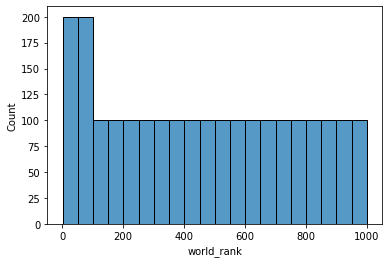

In [185]:
sns.histplot(df['world_rank'],kde=False,bins=20)

In [190]:
# there 0to 100 rank is getting 200 hundred coollege and 100 rank and above is 100college getting rank

<AxesSubplot:xlabel='national_rank', ylabel='count'>

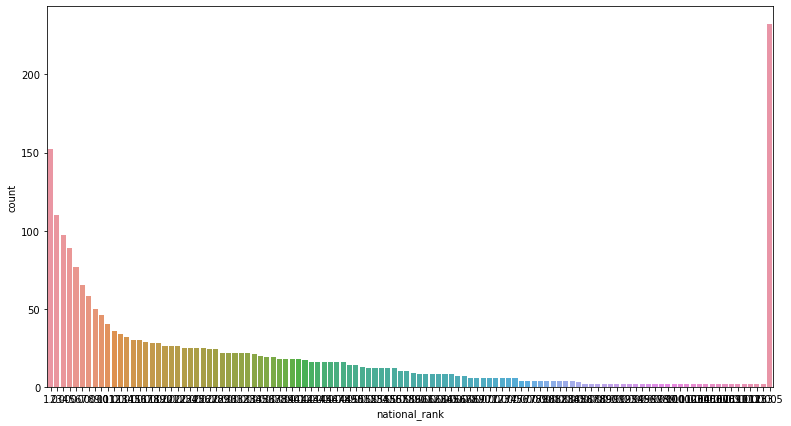

In [189]:
plt.figure(figsize=(13, 7))
sns.countplot(x = df["national_rank"])

In [191]:
#then most of the national rank getting in 150 colleges and least rank getting in 200 and above college

<AxesSubplot:xlabel='alumni_employment', ylabel='count'>

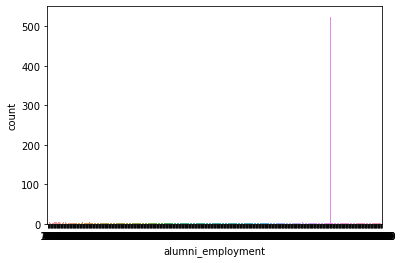

In [194]:
sns.countplot(x = df["alumni_employment"])

In [196]:
#in this graph is getting alumni employe is getting only one college 500 students and the alumni of college others is similar

Text(0, 0.5, 'national_rank')

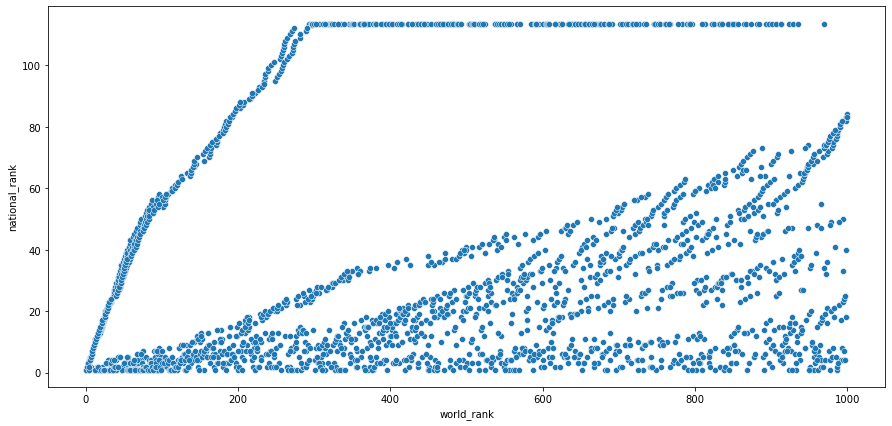

In [197]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["world_rank"], y = df["national_rank"])
plt.xlabel('world_rank')
plt.ylabel('national_rank')

In [198]:
#when college rankings getting same in national and world ranks 

<AxesSubplot:xlabel='world_rank', ylabel='country'>

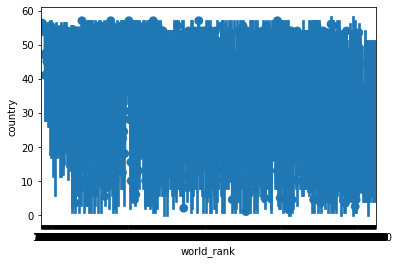

In [199]:
sns.pointplot(x = "world_rank", y = "country", data = df)

In [ ]:
# world rank and country is 0 to 30 country is getting low world rank and 30to 60  getting high world rank

<AxesSubplot:xlabel='national_rank', ylabel='country'>

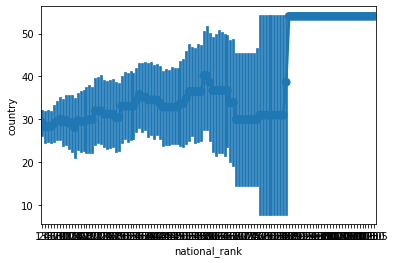

In [200]:
sns.pointplot(x = "national_rank", y = "country", data = df)

In [203]:
# it is graph is getting most of the 30 to 40 countrys

In [39]:
x=df.drop(["world_rank"],axis=1)
y=df["world_rank"]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

# linear regression

In [41]:
reg=LinearRegression()

In [42]:
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
reg.score(x_train,y_train)


0.9425161515240293

In [44]:
reg.score(x_test,y_test)


0.9377939278421673

# k_nearest neighbor

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
NNH=KNeighborsRegressor(n_neighbors=5,metric='minkowski',weights='distance',algorithm='brute',leaf_size=30,metric_params=None,p=2,n_jobs=None)

In [47]:
NNH.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', weights='distance')

In [48]:
NNH.score(x_train,y_train)

0.999999999999999

In [49]:
NNH.score(x_test, y_test)

0.973597955100429

# bagging

In [50]:
from sklearn.ensemble import BaggingRegressor

In [51]:
model=BaggingRegressor(n_estimators=50,base_estimator=None,max_samples=1.0,max_features=1.0)

In [52]:
model.fit(x_train,y_train)

BaggingRegressor(n_estimators=50)

In [53]:
model.score(x_train,y_train)

0.9996509982243327

In [54]:
model.score(x_test,y_test)

0.9983698459548614

# decision tree

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
dtree=DecisionTreeRegressor()

In [57]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [58]:
dtree.score(x_train,y_train)

1.0

In [59]:
dtree.score(x_test,y_test)

0.99629642162024

# ada boosting

In [60]:
from sklearn.ensemble import AdaBoostRegressor

In [61]:
cs=AdaBoostRegressor( n_estimators=5,base_estimator=dtree,loss='linear', learning_rate=1.0)

In [62]:
cs.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=5)

In [63]:
cs.score(x_train,y_train)

0.9999656534420217

In [64]:
cs.score(x_test,y_test)

0.9987868243391742

# gradient boosting

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
gb=GradientBoostingRegressor(random_state=15)

In [67]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(random_state=15)

In [68]:
gb.score(x_train,y_train)

0.9986421933378278

In [69]:
gb.score(x_test,y_test)

0.9974295745634774

# random forest classifier

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rf=RandomForestRegressor(n_estimators=100,max_depth=None,random_state=None,min_weight_fraction_leaf=0.0,max_leaf_nodes=None,max_features='sqrt',oob_score=False)

In [72]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt')

In [73]:
rf.score(x_train,y_train)

0.9992032517694024

In [74]:
rf.score(x_test,y_test)

0.9959956860067432

# xgboosting

In [75]:
import xgboost as xgb

In [76]:
xg=xgb.XGBRegressor(random_state=2,n_estimators=150,max_depth=4,learning_rate=0.10000012,base_score=0.9)

In [77]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.9, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.10000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [78]:
xg.score(x_train,y_train)

0.9996536157324725

In [79]:
xg.score(x_test,y_test)

0.9980030657888718

In [80]:
from sklearn import svm

In [81]:
svc=svm.SVR(kernel='rbf',degree=3,shrinking=True)

In [82]:
svc.fit(x_train,y_train)

SVR()

In [83]:
svc.score(x_train,y_train)

0.721698275777265

In [84]:
svc.score(x_test,y_test)

0.7225904090127326

# min max scaler

In [85]:
df_min=df.copy()

In [86]:
from sklearn.preprocessing import MinMaxScaler
got=MinMaxScaler()
df['broad_impact']=got.fit_transform(df[['broad_impact']])
df['score']=got.fit_transform(df[['score']])
x=df.drop(["score"],axis=1)
y=df["score"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [87]:
reg.fit(x_train,y_train)

LinearRegression()

In [88]:
reg.score(x_test,y_test)


0.7896246076485254

In [89]:
reg.score(x_train,y_train)
 

0.7666408191441219

# bagging

In [90]:
from sklearn.ensemble import BaggingRegressor

In [91]:
model=BaggingRegressor(n_estimators=50)

In [92]:
model.fit(x_train,y_train)

BaggingRegressor(n_estimators=50)

In [93]:
model.score(x_test,y_test)

0.9983932030441873

In [94]:
model.score(x_train,y_train)

0.9996535665578657

# decision tree

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
dtree=DecisionTreeRegressor()

In [97]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [98]:
dtree.score(x_train,y_train)

1.0

In [99]:
dtree.score(x_test,y_test)

0.9965949618196506

# k-nearest neighbors

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
NNH=KNeighborsRegressor(n_neighbors=5,weights='distance',algorithm='brute',p=2)

In [102]:
NNH.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', weights='distance')

In [103]:
NNH.score(x_train,y_train)

0.9999999999997398

In [104]:
NNH.score(x_test, y_test)

0.9104292931635753

# ada boosting

In [105]:
from sklearn.ensemble import AdaBoostRegressor

In [106]:
cs=AdaBoostRegressor( n_estimators=5,base_estimator=dtree,loss='linear', learning_rate=1.0)

In [107]:
cs.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=5)

In [108]:
cs.score(x_train,y_train)

0.999943236273899

In [109]:
cs.score(x_test,y_test)

0.9967842538274955

# xgboost

In [110]:
import xgboost as xgb

In [111]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [112]:
xg=xgb.XGBRegressor(random_state=2,n_estimators=150,max_depth=4,learning_rate=0.10000012,base_score=0.9)

In [113]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.9, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.10000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [114]:
xg.score(x_train,y_train)

0.9998664793748133

 xg.score(x_train,y_train)

In [115]:
xg.score(x_test,y_test)

0.9982468489211095

# gradient

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
gb=GradientBoostingRegressor(random_state=15)

In [118]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(random_state=15)

In [119]:
gb.score(x_train,y_train)

0.9992058764431321

In [120]:
gb.score(x_test,y_test)
 

0.9978245007058667

# random forest regressor

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
rf=RandomForestRegressor(n_estimators=100,max_depth=None,random_state=None,min_weight_fraction_leaf=0.0,max_leaf_nodes=None,max_features='sqrt',oob_score=False)

In [123]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt')

In [124]:
rf.score(x_train,y_train)

0.997330639049308

In [125]:
rf.score(x_test,y_test)

0.985940675635649

# svm

In [126]:
from sklearn import svm

In [127]:
svr=svm.SVR(kernel='rbf',degree=3,shrinking=True)

In [128]:
svr.fit(x_train,y_train)

SVR()

In [129]:
svr.score(x_train,y_train)

0.8270265646599191

In [130]:
svr.score(x_test,y_test)

0.861597655648685

df_std=df.copy()

# standard scaler

In [132]:
from sklearn.preprocessing import StandardScaler
got=StandardScaler()
df_std['broad_impact']=got.fit_transform(df_std[['broad_impact']])
df_std['score']=got.fit_transform(df_std[['score']])

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [135]:
reg.fit(x_train,y_train)

LinearRegression()

In [136]:
reg.score(x_test,y_test)


0.7896246076485254

In [137]:
reg.score(x_train,y_train)

0.7666408191441219

# bagging

In [138]:
from sklearn.ensemble import BaggingRegressor

In [139]:
model=BaggingRegressor(n_estimators=50)

In [140]:
model.fit(x_train,y_train)

BaggingRegressor(n_estimators=50)

In [141]:
model.score(x_test,y_test)

0.9985130947239823

In [142]:
model.score(x_train,y_train)

0.9997084192268925

# decision tree

In [143]:
from sklearn.tree import DecisionTreeRegressor

In [144]:
dtree=DecisionTreeRegressor()

In [145]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [146]:
dtree.score(x_train,y_train)

1.0

In [147]:
dtree.score(x_test,y_test)

0.9961240643093853

# knn

In [148]:
from sklearn.neighbors import KNeighborsRegressor

In [149]:
NNH=KNeighborsRegressor(n_neighbors=5,weights='distance',algorithm='brute',p=2)

In [150]:
NNH.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', weights='distance')

In [151]:
NNH.score(x_train,y_train)

0.9999999999997398

In [152]:
NNH.score(x_test, y_test)

0.9104292931635753

# ada boosting

In [153]:
from sklearn.ensemble import AdaBoostRegressor

In [154]:
cs=AdaBoostRegressor( n_estimators=5,base_estimator=dtree,loss='linear', learning_rate=1.0)

In [155]:
cs.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=5)

In [156]:
cs.score(x_train,y_train)

0.9999815282115984

In [157]:
cs.score(x_test,y_test)

0.9975572182214174

# xgboosting

In [158]:
import xgboost as xgb

In [159]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [160]:
xg=xgb.XGBRegressor(random_state=2,n_estimators=150,max_depth=4,learning_rate=0.10000012,base_score=0.9)

In [161]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.9, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.10000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [162]:
xg.score(x_train,y_train)

0.9998664793748133

In [163]:
xg.score(x_test,y_test)

0.9982468489211095

# gradient

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

In [165]:
gb=GradientBoostingRegressor(random_state=15)

In [166]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(random_state=15)

In [167]:
gb.score(x_train,y_train)

0.9992058764431321

In [168]:
gb.score(x_test,y_test)
 

0.9978245007058667

# random forest

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
rf=RandomForestRegressor(n_estimators=100,max_depth=None,random_state=None,min_weight_fraction_leaf=0.0,max_leaf_nodes=None,max_features='sqrt',oob_score=False)

In [171]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt')

In [172]:
rf.score(x_train,y_train)

0.9978235447010745

In [173]:
rf.score(x_test,y_test)
 

0.9878078056832859

# svm

In [ ]:
from sklearn import svm

In [174]:
svr=svm.SVR(kernel='rbf',degree=3,shrinking=True)

In [175]:
svr.fit(x_train,y_train)

SVR()

In [176]:
svr.score(x_train,y_train)

0.8270265646599191

In [177]:
svr.score(x_train,y_train)

0.8270265646599191

# cross validation

In [183]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=8)
score=cross_val_score(cs,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [-0.47402688  0.93218103  0.11301753 -3.1124961   0.99062051  0.76982072
 -0.67758775 -4.46368974]
Average Cross Validation score :-0.7402700823834507


In [133]:
import warnings
warnings.filterwarnings("ignore")